<a href="https://colab.research.google.com/github/VivekGangurde94/Mlproject/blob/main/AF__Formation__classifier_on_yolo_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import os
import numpy
src_path='drive/MyDrive/american_football_formation'

train_path=os.path.join(src_path,'train')
val_path=os.path.join(src_path,'validation')

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 kB 16.2 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO('yolov8n-cls.pt')

100%|██████████| 5.28M/5.28M [00:00<00:00, 81.8MB/s]


In [7]:
result = model.train(data='drive/MyDrive/american_football_formation',epochs=20, imgsz=64)

Ultralytics YOLOv8.0.136 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=drive/MyDrive/american_football_formation, epochs=20, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=F

In [8]:
# to download or the data to the drive
!scp -r /content/runs '/content/drive/MyDrive/american_football_formation'

In [15]:
model=YOLO('drive/MyDrive/american_football_formation/runs/classify/train2/weights/last.pt') #load a custom model

In [86]:
results= model('drive/MyDrive/test/test2.png') #predict on image


image 1/1 /content/drive/MyDrive/test/test2.png: 64x64 kick_off 0.87, T_formation 0.08, wing_formation 0.05, 14.3ms
Speed: 0.7ms preprocess, 14.3ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


In [87]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
keys: ['probs']
masks: None
names: {0: 'T_formation', 1: 'kick_off', 2: 'wing_formation'}
orig_img: array([[[253, 255, 255],
        [253, 255, 255],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[250, 254, 254],
        [250, 253, 254],
        [250, 253, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[246, 251, 250],
        [246, 250, 252],
        [246, 250, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 75, 103,  84],
        [ 74, 101,  82],
        [ 71,  94,  77],
        ...,
        [ 66, 105,  79],
        [ 67, 105,  80],
        [ 65, 104,  79]],

       [[ 76, 103,  85],
        [ 75,  99,  82],
        [ 81, 102,  86],
        ...,
        [ 66, 105,  79],
        [ 67, 105,  80],


In [88]:
names_dict=results[0].names
probs=results[0].probs
print(probs)
print(names_dict)

ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0796, 0.8690, 0.0513])
orig_shape: None
shape: torch.Size([3])
top1: 1
top1conf: tensor(0.8690)
top5: [1, 0, 2]
top5conf: tensor([0.8690, 0.0796, 0.0513])
{0: 'T_formation', 1: 'kick_off', 2: 'wing_formation'}


In [89]:
probs = results[0].probs.data.tolist()
class_labels = results[0].names

print(probs)
print(class_labels)

[0.07962209731340408, 0.8690492510795593, 0.05132867768406868]
{0: 'T_formation', 1: 'kick_off', 2: 'wing_formation'}


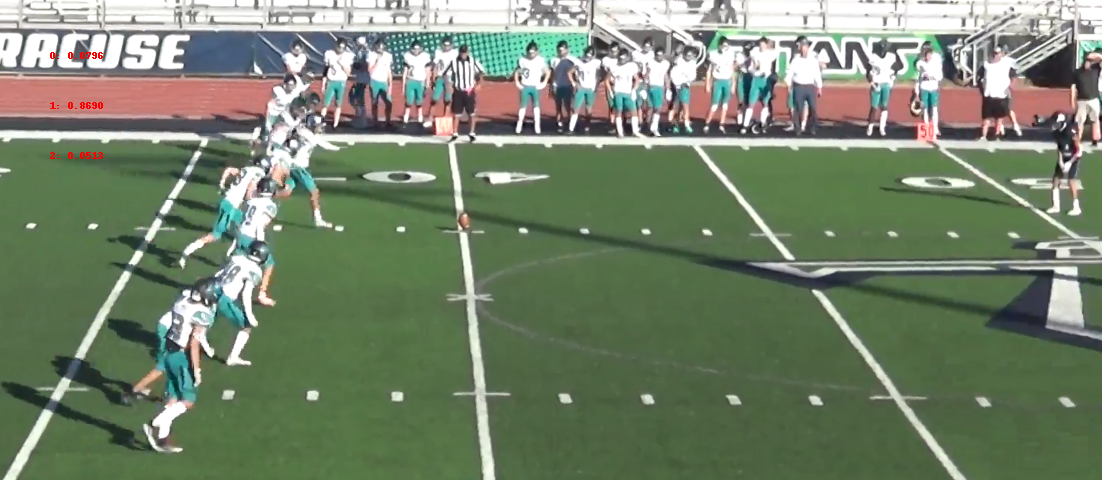

In [93]:
from PIL import Image, ImageDraw

# Load the image
image_path = 'drive/MyDrive/test/test2.png'
image = Image.open(image_path)

# Get the probabilities and class labels
probs = results[0].probs.data.tolist()
class_labels = results[0].names

# Prepare the image for drawing
draw = ImageDraw.Draw(image)

# Draw the probabilities and class labels on the image
text_position = (50, 50)
for i, (prob, label) in enumerate(zip(probs, class_labels)):
    text = f'{label}: {prob:.4f}'
    draw.text(text_position, text, fill='red')
    text_position = (text_position[0], text_position[1] + 50)

# Show the image
image.show()